In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [85]:
import pandas as pd
import os
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
%config Completer.use_jedi = False

In [7]:
'assists', 'baronKills', 'bountyLevel', 'challenges', 'champExperience', 'champLevel', 'championId', 'championName', 'championTransform', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'lane', 'largestCriticalStrike', 'largestKillingSpree', 'largestMultiKill', 'longestTimeSpentLiving', 'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken', 'neutralMinionsKilled', 'nexusKills', 'nexusLost', 'nexusTakedowns', 'objectivesStolen', 'objectivesStolenAssists', 'participantId', 'pentaKills', 'perks', 'physicalDamageDealt', 'physicalDamageDealtToChampions', 'physicalDamageTaken', 'profileIcon', 'puuid', 'quadraKills', 'riotIdName', 'riotIdTagline', 'role', 'sightWardsBoughtInGame', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id', 'summonerId', 'summonerLevel', 'summonerName', 'teamEarlySurrendered', 'teamId', 'teamPosition', 'timeCCingOthers', 'timePlayed', 'totalDamageDealt', 'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates', 'totalDamageTaken', 'totalHeal', 'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt', 'totalTimeSpentDead', 'totalUnitsHealed', 'tripleKills', 'trueDamageDealt', 'trueDamageDealtToChampions', 'trueDamageTaken', 'turretKills', 'turretTakedowns', 'turretsLost', 'unrealKills', 'visionScore', 'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced', 'win'

('assists',
 'baronKills',
 'bountyLevel',
 'challenges',
 'champExperience',
 'champLevel',
 'championId',
 'championName',
 'championTransform',
 'consumablesPurchased',
 'damageDealtToBuildings',
 'damageDealtToObjectives',
 'damageDealtToTurrets',
 'damageSelfMitigated',
 'deaths',
 'detectorWardsPlaced',
 'doubleKills',
 'dragonKills',
 'firstBloodAssist',
 'firstBloodKill',
 'firstTowerAssist',
 'firstTowerKill',
 'gameEndedInEarlySurrender',
 'gameEndedInSurrender',
 'goldEarned',
 'goldSpent',
 'individualPosition',
 'inhibitorKills',
 'inhibitorTakedowns',
 'inhibitorsLost',
 'item0',
 'item1',
 'item2',
 'item3',
 'item4',
 'item5',
 'item6',
 'itemsPurchased',
 'killingSprees',
 'kills',
 'lane',
 'largestCriticalStrike',
 'largestKillingSpree',
 'largestMultiKill',
 'longestTimeSpentLiving',
 'magicDamageDealt',
 'magicDamageDealtToChampions',
 'magicDamageTaken',
 'neutralMinionsKilled',
 'nexusKills',
 'nexusLost',
 'nexusTakedowns',
 'objectivesStolen',
 'objectivesStole

In [8]:
'damageDealtToObjectives'
'damageDealtToTurrets'
'detectorWardsPlaced'
'sightWardsBoughtInGame'
'totalDamageDealt'
'totalDamageDealtToChampions'
'totalTimeSpentDead'
'visionScore'
'visionWardsBoughtInGame'

'visionWardsBoughtInGame'

In [10]:
os.listdir()

['.ipynb_checkpoints',
 '.tmp.driveupload',
 '1',
 '2',
 '3',
 '4',
 '930_matches_df_19_05',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'BOTHPARCIAL',
 'BOTH_FEATURES tentativa2.ipynb',
 'BOTH_FEATURES.ipynb',
 'Collect_mastery_points.ipynb',
 'CSV data to dataset-kda.ipynb',
 'CSV data to dataset.ipynb',
 'CS_min.ipynb',
 'desktop.ini',
 'df_correto_20features_839partidas_sem_erro',
 'df_final_provisorio',
 'df_prov_200_linhas',
 'eduroam-W10-U-UoSP-eduroam.exe',
 'Enunciado-EP1.pdf',
 'ep02_logreg (1).ipynb',
 'ep02_logreg.ipynb',
 'Experimentos 17_05 ML.ipynb',
 'Extracting data from CSVs (1).ipynb',
 'filtropassivo.pdf',
 'finallllllcomtarget',
 'FOURIER QUADRADA.xlsx',
 'fts',
 'gabex1.py',
 'gabex2.py',
 'Gráficos_lab_3_11_05.ipynb',
 'H10_Síntese Atv. 1 Exp. 2 Grupo H10_corrigida.pdf',
 'H10_Síntese Atv. 2 Exp. 2_corrigida (1).pdf',
 'H10_Síntese Atv. 2 Exp. 2_corrigida.pdf',
 'kda.ipynb',
 'Lista1-2022 (1).pdf',
 'Lista1-2022.pdf',
 'LoL project',
 'MathematicaStudent_13.0.1_WIN

In [14]:
df = pd.read_csv('930_matches_df_19_05')
df

,Unnamed: 0,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,...,27869,28759,90591,139033,5702,6894,17226,60900,104796,1
1,1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,...,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839,0
2,2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,...,18062,30808,35375,53165,1209,10990,11605,17510,1377402,1
3,3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,...,159593,191837,193851,292959,19550,47094,58443,87329,464856,0
4,4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,...,10714,15688,34450,101033,11441,11980,22250,52517,71398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,925,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,...,10650,35904,56382,495855,2743,66034,202130,709380,721154,1
926,926,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,...,18754,85240,100878,543559,2092,3374,6775,12643,946303,1
927,927,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,...,10958,37538,139703,150471,8974,9033,27138,152271,178701,0
928,928,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,...,3571,11851,48540,381589,38679,65706,352602,394108,825205,1


In [15]:
df.columns

Index(['Unnamed: 0', '5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue', '5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red',
       '5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue', '5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red', '5th_MP_blue', '4th_MP_blue',
       '3rd_MP_blue', '2nd_MP_blue', '1st_MP_blue', '5th_MP_red', '4th_MP_red',
       '3rd_MP_red', '2nd_MP_red', '1st_MP_red', 'target'],
      dtype='object')

In [16]:
df = df.drop('Unnamed: 0',axis = 1)
df

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,6.067965,...,27869,28759,90591,139033,5702,6894,17226,60900,104796,1
1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,6.146694,...,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839,0
2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,6.289723,...,18062,30808,35375,53165,1209,10990,11605,17510,1377402,1
3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,6.529087,...,159593,191837,193851,292959,19550,47094,58443,87329,464856,0
4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,7.049121,...,10714,15688,34450,101033,11441,11980,22250,52517,71398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,5.414535,...,10650,35904,56382,495855,2743,66034,202130,709380,721154,1
926,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,5.850610,...,18754,85240,100878,543559,2092,3374,6775,12643,946303,1
927,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,5.424155,...,10958,37538,139703,150471,8974,9033,27138,152271,178701,0
928,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,6.960445,...,3571,11851,48540,381589,38679,65706,352602,394108,825205,1


In [94]:
target_0 = df[df['target'] == 0]
target_0

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,6.146694,...,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839,0
3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,6.529087,...,159593,191837,193851,292959,19550,47094,58443,87329,464856,0
6,4.472534,4.810906,4.955139,5.355958,5.721130,4.749231,5.181198,5.445495,5.605465,6.511166,...,19056,115629,126997,246185,19819,31472,67054,81648,112911,0
7,3.286157,3.766862,3.951461,4.978008,5.196312,2.239925,2.866182,5.192948,5.197383,5.207533,...,66115,89248,101057,388195,20450,51604,52707,202799,578000,0
9,3.276549,5.134055,5.257272,6.611037,6.810433,2.792183,5.298205,6.062658,6.131319,6.451663,...,44297,105701,367634,887214,8522,45092,50533,88572,165917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.026789,2.889229,4.383217,5.678582,5.983096,1.604781,1.775562,5.284430,5.739996,5.746390,...,1889,21099,141754,214724,909,2766,12071,18720,119415,0
193,3.840878,5.531362,6.061966,6.224089,7.100424,2.784665,4.813119,6.035497,6.232771,6.464082,...,7561,11140,16154,197438,22798,25004,71821,73788,136311,0
195,1.475992,4.478949,4.755746,5.393133,5.980546,1.962413,3.027399,4.343279,4.831130,5.812953,...,13480,25404,55559,93982,4382,9706,27528,29176,29497,0
197,2.171187,4.388464,5.024654,5.655208,5.701138,3.657918,5.025193,5.349310,5.379792,5.430343,...,43372,76696,112978,157181,8220,84963,231434,358075,526664,0


In [95]:
target_1 = df[df['target'] == 1]
target_1

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,6.067965,...,27869,28759,90591,139033,5702,6894,17226,60900,104796,1
2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,6.289723,...,18062,30808,35375,53165,1209,10990,11605,17510,1377402,1
4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,7.049121,...,10714,15688,34450,101033,11441,11980,22250,52517,71398,1
5,2.644389,5.199415,5.503391,5.655353,6.200887,4.063226,5.430062,5.500375,5.549201,5.636110,...,41386,50597,247588,474007,1189,17294,93613,150498,172625,1
8,4.332481,4.863864,5.433011,5.939229,6.163897,1.655889,5.075672,5.890354,6.024075,6.367993,...,13276,20377,89743,118519,15780,49990,56630,93419,630045,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.998393,3.672954,4.475855,4.585855,7.106356,4.146929,4.154088,4.615459,5.000079,6.531437,...,11920,62826,117249,322957,312,2813,7859,8371,18099,1
191,1.098350,3.273859,4.176391,5.294193,6.684138,2.601169,4.307038,6.119290,6.377257,6.726794,...,59050,136850,264528,589259,17028,21135,53873,58887,428341,1
194,1.594282,4.578810,4.771605,4.784480,5.458977,1.892406,3.300769,5.065059,5.541081,5.740793,...,64598,65761,109542,262557,151,16060,31385,36120,224616,1
196,2.819669,3.162375,4.835201,5.283253,6.307108,2.179434,4.317763,4.322423,5.316012,6.156311,...,19476,42398,79156,145384,30839,34952,69067,126656,159434,1


In [57]:
os.getcwd()

'C:\\Users\\gmbas\\Downloads'

In [58]:
os.listdir()

['.ipynb_checkpoints',
 '.tmp.driveupload',
 '1',
 '2',
 '3',
 '4',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'BOTHPARCIAL',
 'BOTH_FEATURES tentativa2.ipynb',
 'BOTH_FEATURES.ipynb',
 'Collect_mastery_points.ipynb',
 'CSV data to dataset-kda.ipynb',
 'CSV data to dataset.ipynb',
 'CS_min.ipynb',
 'desktop.ini',
 'df_correto_20features_839partidas_sem_erro',
 'df_final_provisorio',
 'df_prov_200_linhas',
 'eduroam-W10-U-UoSP-eduroam.exe',
 'Enunciado-EP1.pdf',
 'ep02_logreg (1).ipynb',
 'ep02_logreg.ipynb',
 'Extracting data from CSVs (1).ipynb',
 'filtropassivo.pdf',
 'finallllllcomtarget',
 'FOURIER QUADRADA.xlsx',
 'fts',
 'gabex1.py',
 'gabex2.py',
 'Gráficos_lab_3_11_05.ipynb',
 'kda.ipynb',
 'Lista1-2022 (1).pdf',
 'Lista1-2022.pdf',
 'LoL project',
 'MathematicaStudent_13.0.1_WIN.exe',
 'older matches',
 'Paragon-1081-FRU_WinInstallDemo_x64_17.9.1_000.exe',
 'parte2',
 'parte3',
 'partidas',
 'partidas2',
 'PCGameBenchmark_Detector.exe',
 'prev',
 'python-2.7.amd64.msi',
 'Surfs

In [19]:
log_reg = LogisticRegression()

In [20]:
df.describe()

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
count,928.000000,928.000000,927.000000,929.000000,923.000000,927.000000,923.000000,926.000000,928.000000,928.000000,...,930.000000,930.000000,9.300000e+02,9.300000e+02,930.000000,930.000000,930.000000,9.300000e+02,9.300000e+02,930.000000
mean,2.322496,4.326412,5.094631,5.614888,6.193981,2.285168,4.333682,5.094544,5.578025,6.160085,...,34817.878495,76042.909677,1.640336e+05,4.366395e+05,12712.505376,34077.925806,72548.040860,1.558111e+05,4.500533e+05,0.512903
std,1.346201,1.047677,0.728114,0.685011,0.712584,1.347802,1.048422,0.790167,0.758918,0.774784,...,40123.860985,83096.215364,2.054224e+05,5.145408e+05,17489.610461,40351.729734,81879.270317,1.727080e+05,6.052151e+05,0.500102
min,0.003120,0.775052,1.442221,1.398153,4.070783,0.000619,0.469951,1.634657,0.517667,1.171021,...,210.000000,865.000000,1.660000e+03,1.999000e+03,111.000000,175.000000,292.000000,1.038000e+03,3.615000e+03,0.000000
25%,1.219662,3.763078,4.705432,5.211844,5.716881,1.215031,3.713652,4.581021,5.125238,5.667248,...,11049.000000,26418.500000,5.646950e+04,1.400155e+05,2877.250000,10147.250000,25193.000000,5.405725e+04,1.365465e+05,0.000000
50%,2.063810,4.493776,5.142143,5.617726,6.150421,1.924334,4.498963,5.148593,5.610840,6.164076,...,22219.000000,50682.000000,1.079360e+05,2.816840e+05,7406.000000,22027.000000,47852.000000,1.030670e+05,2.813675e+05,1.000000
75%,3.352462,5.043719,5.590931,6.029564,6.642654,3.278658,5.054788,5.656323,6.085576,6.674257,...,45357.250000,94225.500000,1.948080e+05,5.453498e+05,15024.750000,39907.000000,91883.750000,1.835908e+05,5.494998e+05,1.000000
max,6.299134,6.776709,7.107505,8.151535,8.655552,7.798711,7.006311,7.279754,8.058324,8.437891,...,426197.000000,728691.000000,3.040368e+06,6.035334e+06,218314.000000,308163.000000,973042.000000,1.543617e+06,8.835268e+06,1.000000


In [21]:
df.shape

(930, 31)

In [22]:
df = df.dropna()
df.shape

(907, 31)

In [23]:
y = df['target']
X = df.drop('target',axis = 1)
#df[0:160], df[161:]

In [24]:
X.shape

(907, 30)

In [25]:
y.shape

(907,)

In [29]:
cutoff = round(X.shape[0]*0.8)
X_train,X_test = X[0:cutoff], X[cutoff:]
y_train,y_test = y[0:cutoff], y[cutoff:]

In [35]:
s_scaler = StandardScaler()

In [36]:
s_scaler.fit(X_train)

StandardScaler()

In [37]:
X_train = s_scaler.transform(X_train)
X_test = s_scaler.transform(X_test)

In [38]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,-0.064371,-0.079681,-0.020049,0.042148,0.028485,0.046166,0.124691,0.183781,0.114023,0.098201,...,-0.139316,-0.048298,-0.069523,-0.041018,0.184568,-0.050445,0.007386,0.036440,0.102382,0.191286
std,0.980812,1.040064,0.988518,0.923562,0.930076,1.050284,1.014706,1.030257,0.931728,0.938471,...,0.795091,0.767650,0.692185,0.647664,1.339923,1.102731,0.955259,0.900591,1.051063,1.662098
min,-1.739329,-3.073992,-2.666053,-2.563126,-2.928842,-1.717514,-3.285183,-3.926932,-2.548004,-2.629469,...,-0.788735,-0.817096,-0.860457,-0.735417,-0.856385,-0.754368,-0.831113,-0.837543,-0.831242,-0.766483
25%,-0.837332,-0.654202,-0.535649,-0.510792,-0.621634,-0.798637,-0.391482,-0.453543,-0.461182,-0.650677,...,-0.657469,-0.574710,-0.568511,-0.472349,-0.575434,-0.594252,-0.596194,-0.570513,-0.581578,-0.541119
50%,-0.334095,0.092752,0.075558,0.113519,0.122958,-0.221065,0.262628,0.245360,0.080308,0.029296,...,-0.401773,-0.296126,-0.303137,-0.256592,-0.286942,-0.354308,-0.343111,-0.292676,-0.266737,-0.247237
75%,0.589681,0.685360,0.625367,0.579007,0.711138,0.809557,0.745749,0.811825,0.753156,0.704001,...,0.016620,0.230733,0.141002,0.194780,0.441231,0.031085,0.193500,0.389702,0.360492,0.357010
max,2.412525,1.892948,2.092138,2.676295,2.638628,2.680431,2.015298,2.905297,2.734271,2.703688,...,3.821424,4.547245,2.249103,2.807189,7.387918,10.632302,4.369368,4.290807,5.714206,16.029327


In [40]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.934720,0.264071,1.136751,0.634853,0.223033,1.635646,1.995610,2.905297,2.734271,2.703688,...,0.637653,0.636293,2.037144,0.511259,3.348307,-0.017785,-0.096205,0.462018,1.919400,0.456190
1,0.793346,0.891138,0.627928,0.638197,0.852881,-0.042166,0.101126,-0.161883,-0.013675,-0.650677,...,-0.147757,-0.146348,-0.374074,-0.500371,-0.533330,-0.696223,-0.224431,-0.361318,-0.579744,-0.698604
2,-0.997876,-0.666719,-1.797347,-2.370262,-2.928842,-1.302236,-0.373878,0.697937,0.105633,-0.605345,...,-0.237060,-0.098275,-0.000520,-0.045014,-0.536126,-0.546831,-0.672612,-0.589286,-0.630453,-0.590317
3,0.604993,-0.910440,0.276898,-0.061690,-0.392043,0.669730,0.522013,0.112301,-0.365966,-0.717169,...,-0.299472,0.443857,0.627940,0.311526,-0.368403,-0.617788,-0.065541,-0.345884,-0.610725,2.251155
4,1.673086,1.198732,0.669009,0.221329,-0.120669,-0.561699,1.076830,1.228424,1.855123,2.347160,...,-0.722066,-0.323441,-0.537392,-0.518796,-0.217881,-0.468802,-0.558644,-0.449748,-0.507053,-0.571788


In [41]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [84]:
#test score
log_reg.score(X_train,y_train)

0.6101928374655647

In [42]:
#test score
log_reg.score(X_test,y_test)

0.5469613259668509

In [46]:
y_test.shape

(181,)

In [50]:
np.array(y_test).reshape(-1, 1).shape

(181, 1)

In [77]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [57]:
y_test.shape

(181, 1)

In [58]:
y_pred_prob.shape

(180, 2)

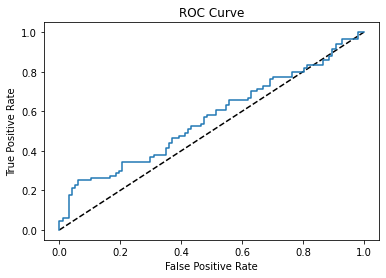

In [63]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [80]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.5648011782032402

**KNN**

In [65]:
knn = KNeighborsClassifier()

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [83]:
knn.score(X_train,y_train)

0.7066115702479339

In [67]:
knn.score(X_test,y_test)

0.5359116022099447

In [68]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

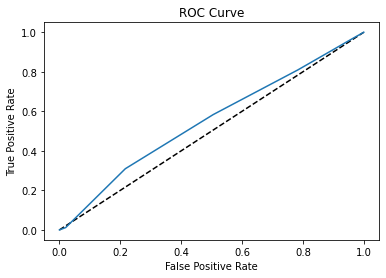

In [69]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [71]:
y_pred = knn.predict(X_test)

In [73]:
cmatrix = confusion_matrix(y_test,y_pred)
cmatrix

array([[48, 49],
       [35, 49]], dtype=int64)

<AxesSubplot:title={'center':'Matriz de confusão'}>

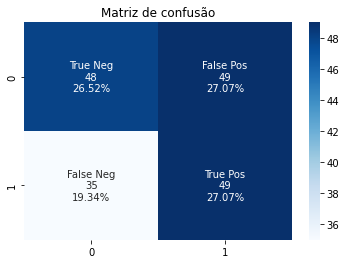

In [81]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cmatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Matriz de confusão')
sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')

**Random Forest**

In [86]:
RF = RandomForestClassifier()

In [87]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [89]:
RF.score(X_train,y_train)

1.0

In [88]:
RF.score(X_test,y_test)

0.6243093922651933

In [103]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = RF.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

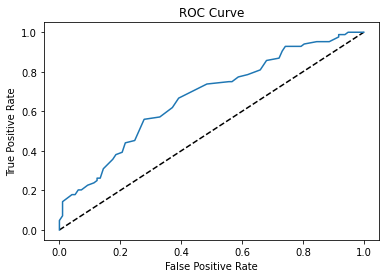

In [104]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [105]:
roc_auc_score(y_test,y_pred_prob)

0.6701030927835051

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
from sklearn.model_selection import TimeSeriesSplit

In [109]:
tss = TimeSeriesSplit()

In [135]:
X_split = tss.split(X)

In [119]:
tss.split(X)

<generator object TimeSeriesSplit.split at 0x0000017C19A8E430>

In [136]:
np.array(pd.DataFrame(X_split))

array([[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
                26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
                39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
                52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
                65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
                78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
                91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
               104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
               117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
               130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
               143, 144, 145, 146, 147, 148, 149, 150, 151])                   ,
        array([152, 153, 154, 155, 156,

In [118]:
X_split

AttributeError: 'generator' object has no attribute 'shape'

In [ ]:
GridSearchCV()

<AxesSubplot:>

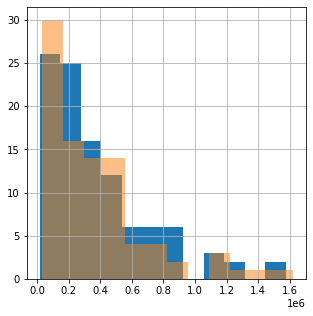

In [104]:
target_0['1st_MP_blue'].hist(bins=12, figsize=(5,5)) #azul
target_1['1st_MP_blue'].hist(bins=12, alpha=0.5,figsize=(5,5)) #laranja

In [90]:
from sklearn.pipeline import Pipeline

In [ ]:
Pipeline()

In [101]:
corr_ = df.corr()

In [102]:
corr_['target'].sort_values(ascending = False)

target             1.000000
2nd_kda_blue       0.100450
5th_MP_blue        0.078411
3rd_kda_blue       0.061765
4th_kda_blue       0.058867
4th_MP_blue        0.056193
1st_kda_blue       0.055660
5th_kda_blue       0.035516
5th_CS_min_blue    0.029647
1st_CS_min_blue    0.027115
3rd_MP_blue        0.024194
4th_CS_min_blue    0.022890
3rd_CS_min_blue    0.021395
2nd_CS_min_blue    0.020938
5th_CS_min_red     0.001093
2nd_MP_blue       -0.000642
1st_MP_blue       -0.019554
3rd_MP_red        -0.025564
1st_MP_red        -0.036093
4th_CS_min_red    -0.046967
1st_kda_red       -0.047289
3rd_CS_min_red    -0.050337
2nd_CS_min_red    -0.050970
1st_CS_min_red    -0.060737
4th_MP_red        -0.067119
5th_MP_red        -0.074167
2nd_kda_red       -0.075419
2nd_MP_red        -0.076029
3rd_kda_red       -0.087912
4th_kda_red       -0.117684
5th_kda_red       -0.127450
Name: target, dtype: float64